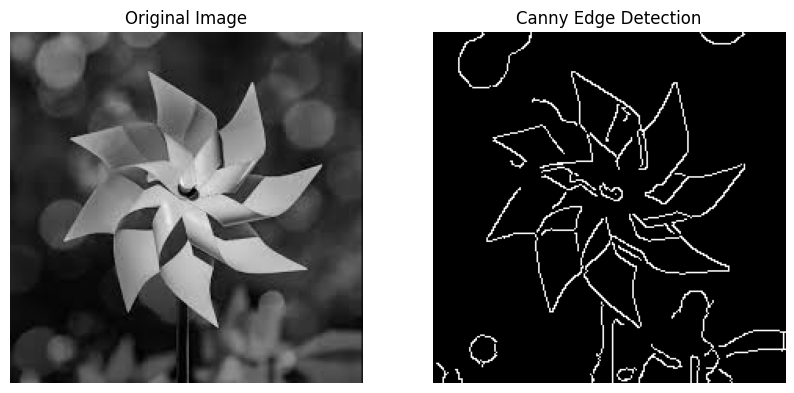

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


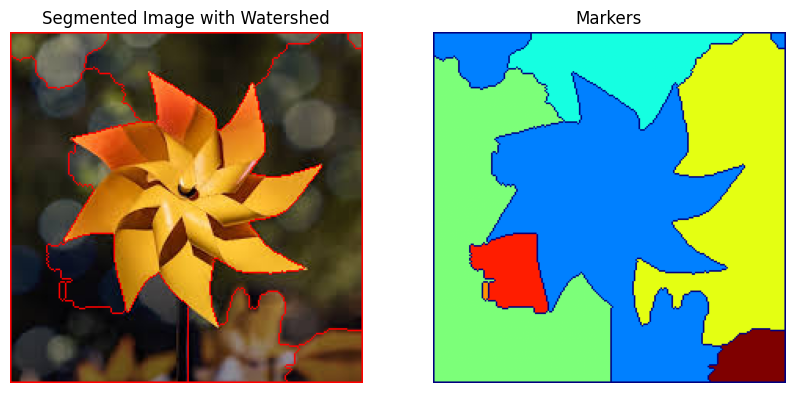

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1

markers[unknown == 255] = 0

markers = cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Watershed')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(markers, cmap='jet')
plt.title('Markers')
plt.axis('off')

plt.show()


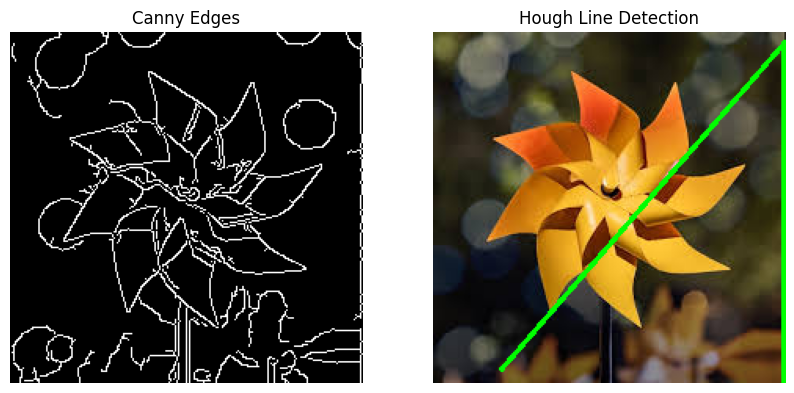

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('pic.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

line_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.axis('off')

plt.show()

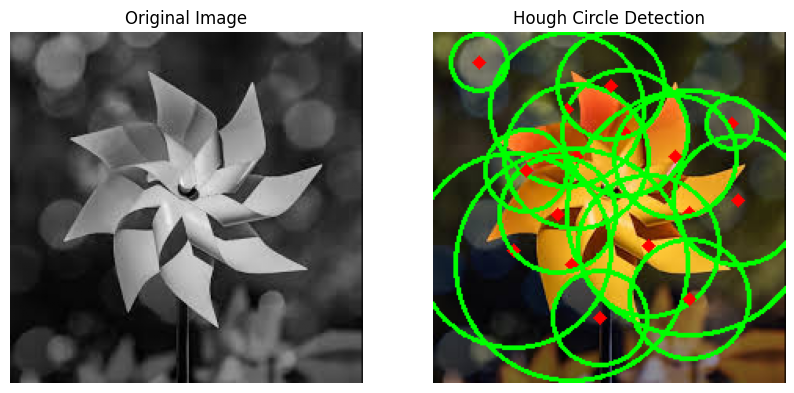

In [28]:
image = cv2.imread('pic.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (9, 9), 2)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=100)

circle_image = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Circle Detection')
plt.axis('off')

plt.show()


In [29]:
import cv2
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [30]:
model = YOLO("yolov8s.pt")
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s


0: 640x640 (no detections), 990.3ms
Speed: 4.0ms preprocess, 990.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


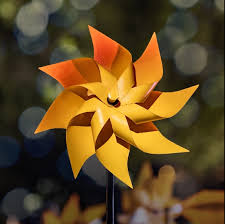

In [31]:
image_path = 'pic.jpg'
image = cv2.imread(image_path)

results = model(image)

results[0].show()


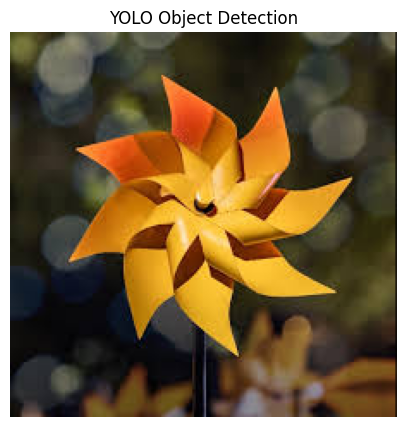

In [32]:
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]
        class_id = int(box.cls[0])

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        label = f"Class {class_id}: {confidence:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("YOLO Object Detection")
plt.show()

In [33]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

In [34]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [35]:
image_path = "pic.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).to(device)


In [36]:
with torch.no_grad():
    predictions = model([image_tensor])

boxes = predictions[0]["boxes"].cpu().numpy()
scores = predictions[0]["scores"].cpu().numpy()
labels = predictions[0]["labels"].cpu().numpy()


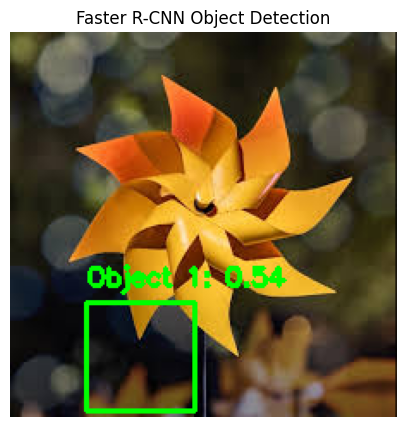

In [37]:
threshold = 0.5
for i in range(len(boxes)):
    if scores[i] > threshold:
        x1, y1, x2, y2 = map(int, boxes[i])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"Object {labels[i]}: {scores[i]:.2f}"
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.axis("off")
plt.title("Faster R-CNN Object Detection")
plt.show()

In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [39]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

num_classes = 100

x_train, x_test = x_train / 255.0, x_test / 255.0

In [40]:
selected_train_indices = []
selected_test_indices = []
class_counts = {i: 0 for i in range(num_classes)}

for i in range(len(y_train)):
    label = y_train[i][0]
    if class_counts[label] < 20:
        selected_train_indices.append(i)
        class_counts[label] += 1
    if all(count == 20 for count in class_counts.values()):
        break

class_counts = {i: 0 for i in range(num_classes)}

for i in range(len(y_test)):
    label = y_test[i][0]
    if class_counts[label] < 20:
        selected_test_indices.append(i)
        class_counts[label] += 1
    if all(count == 20 for count in class_counts.values()):
        break

x_train_small = x_train[selected_train_indices]
y_train_small = y_train[selected_train_indices]
x_test_small = x_test[selected_test_indices]
y_test_small = y_test[selected_test_indices]

y_train_small = to_categorical(y_train_small, num_classes)
y_test_small = to_categorical(y_test_small, num_classes)

In [41]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_small, y_train_small, epochs=10, batch_size=32, validation_data=(x_test_small, y_test_small))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.0130 - loss: 4.6192 - val_accuracy: 0.0125 - val_loss: 4.6041
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.0138 - loss: 4.5986 - val_accuracy: 0.0160 - val_loss: 4.5715
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.0242 - loss: 4.5279 - val_accuracy: 0.0260 - val_loss: 4.4870
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.0267 - loss: 4.4495 - val_accuracy: 0.0220 - val_loss: 4.4247
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.0191 - loss: 4.3830 - val_accuracy: 0.0290 - val_loss: 4.3499
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.0273 - loss: 4.3170 - val_accuracy: 0.0445 - val_loss: 4.3174
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.0336 - loss: 4.2978 - val_accuracy: 0.0430 - val_loss: 4.2868
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.0512 - loss: 4.2235 - val_accuracy: 0.0500 - v

In [43]:
test_loss, test_acc = model.evaluate(x_test_small, y_test_small)
print(f"Test Accuracy: {test_acc:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0690 - loss: 4.1050
Test Accuracy: 0.07


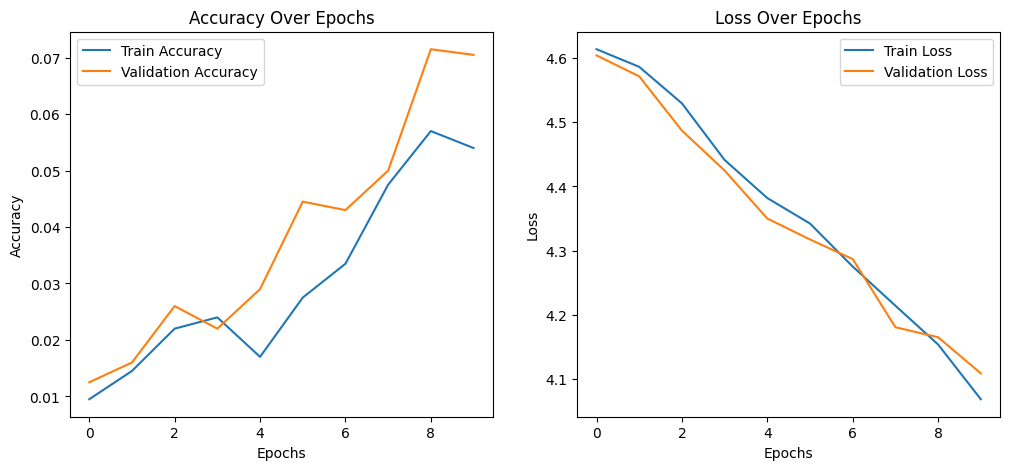

In [44]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()